## Solution for 4.1

In [2]:
from shapely.geometry import Point, LineString, Polygon

In [7]:
# 1. 
poly = Polygon([(-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.96990,9-118.4152,33.9699)])

In [8]:
poly_type = poly.geom_type

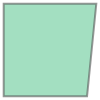

In [9]:
poly

In [12]:
#2.
point1 = Point(-118.4152,33.9699)
point2 = Point(-118.4152,33.9689)
point3 = Point(-118.4144,33.9689)
point4 = Point(-118.4143, 33.96890)
point5 = Point(-118.4142,33.96990)
point6 = Point(9-118.4152,33.9699)
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3, point4, point5, point6]])

In [16]:
#3.
p_centroid = poly.centroid
print(p_centroid)

POINT (-118.4147245614035 33.96940877192983)


In [17]:
#4. The bounding box is the simplest form of a rectangle because it only requires two points, the minimum and maximum of each axis

## Solution for 4.2

In [20]:
#1.
import geopandas as gpd
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [22]:
#2. CRS = coordinate reference system
data.crs

# This data set is using an EPSG:4326 CRS meaning the data is in decimal degrees

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
#3.
data.size

5058

In [27]:
data.columns

Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [28]:
orig = data.copy()

In [29]:
data = data.to_crs(epsg=3857)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

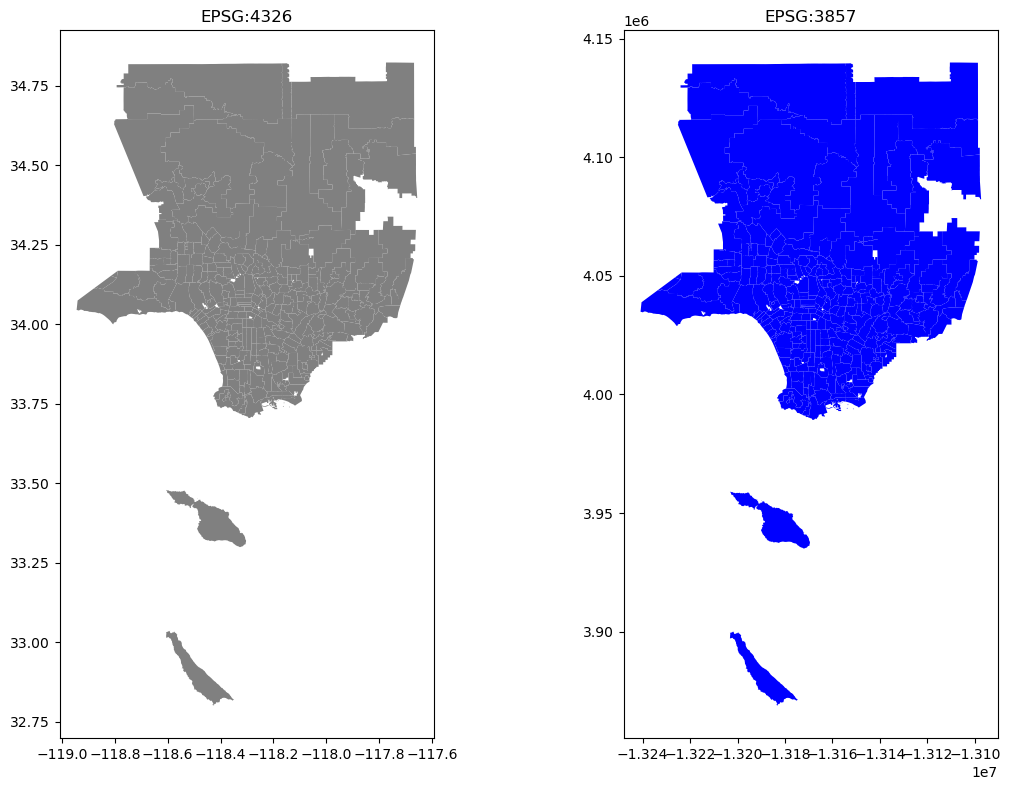

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

orig.plot(ax=ax1, facecolor='gray');

ax1.set_title("EPSG:4326");

data.plot(ax=ax2, facecolor='blue');

ax2.set_title("EPSG:3857");

plt.tight_layout()

Obviously the color is different, where grey makes it easier to see the lines. The values on the y and x-axis are also very different. This is because EPSG:4326 uses decimal degrees on a sphere while EPSG:3857 is over a flat surface. This is also why the shapes are slightly different.